<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 4.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*  

---
  

# Panorama do COVID-19 no Brasil

COVID-19 é uma doença infecciosa causada por recém-descoberto coronavírus.

Transmitido principalmente por meio de gotículas provenientes de tosses ou espirros de pessoas infectadas, a gravidade dos sintomas varia muito de pessoa para pessoa.

Fato é, não se sabe muita coisa a respeito do COVID-19. Estudos estão sendo realizados no mundo todo, porém os resultados ainda não são conclusivos e definitivos.

<center><img alt="Colaboratory logo" width="50%" src="https://static.poder360.com.br/2022/12/coronavirus-imagem-1-848x477.jpg"></center>

Até o presente momento, observa-se que cerca de 80% dos casos confirmados são assintomáticos e rápidos. A maioria das pessoas que se encaixam nesse grupo, se recupera sem nenhuma sequela.

No entanto, 15% das pessoas terão infecções graves e precisarão de oxigênio. O restante das pessoas, que representam 5%, serão classificadas como infecções muito graves e precisarão de ventilação assistida, por meio de respiradores mecânicos em ambiente hospitalar.

Com o objetivo de elevar a consciência situacional a respeito do COVID-19 no Brasil, irei realizar uma análise sobre os dados públicos da doença.

In [39]:
pip install bar_chart_race -q

In [40]:
pip install ffmpeg-python -q

In [41]:
# importar as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
import bar_chart_race as bcr


# importar o dataset COVID-19 para um DataaFrame
df = pd.read_csv('https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/owid-covid-data.csv')


## Análise Exploratória dos Dados
 Esta etapa inicial é crucial, pois nos permite compreender a estrutura e as características do conjunto de dados. Durante a análise exploratória, investigamos detalhadamente cada coluna, identificando os tipos de variáveis presentes, como variáveis numéricas, categóricas, de texto ou de data. Além disso, avaliamos a distribuição dos dados, a presença de valores ausentes, possíveis outliers e a relação entre as variáveis. Compreender esses aspectos é essencial para garantir a qualidade da análise subsequente e para tomar decisões informadas sobre o tratamento dos dados e a escolha dos métodos analíticos mais apropriados

### Análise Exploratória Inicial

* *Visualizar as 5 primeiras entradas*
df.head()`
* *Qual o tamanho do seu DataFrame*
df.shape`
* *Extrair e imprimir os nomes das colunas*
    * `df.columns`
* *Quais os tipos das variáveis*
    * `df.dtypes`
* *Identifique a porcentagem de valores ausentes das colunas*
    * `df.isnull().sum() / df.shape[0]` ou
    * `(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)` *para ordem decrescente.*
* *Transforme a coluna `date` no formato `datetime`*
    * `df.date = pd.to_datetime(df.date)`
* *Ver para a data mais atual, quais os países que têm mais casos e mortes. Veja o exemplo:*
    * `df.loc[df.date == '2020-06-14'].sort_values(by="total_cases", ascending=False)`
    * `df.loc[df.date == '2020-06-14'].sort_values(by="total_deaths", ascending=False)`
* Plotar um gráfico de barras para os 5 países com mais mortes
    * `df.loc[df.date == '2020-06-14', ['location', 'total_deaths']].sort_values(by="total_deaths", ascending=False)[1:6]`
    * `ax.bar('location', 'total_deaths', data=top5_total_deaths)`
* Plotar um gráfico de linhas para ver a evolução do total de casos de COVID-19 no mundo.
    * `df.loc[df.location == "World", "total_deaths"].reset_index(drop=True).plot()`
* [OPCIONAL] Plotar um gráfico de dispersão considerando `gdp_per_capita` (ou seja, o PIB dos países) pelo número total de mortos. Pegue a data mais recente apenas.
    * Lembre-se que não é nada conclusivo, pois envolve fatores como proporcão de testes, etc.


In [42]:
#Analisando o Data Frame
df.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,...,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,...,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,...,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,...,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,...,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5


In [43]:
print(f'Quantidade de linhas: {df.shape[0]}, /n quantidade de colunas: {df.shape[1]}')

Quantidade de linhas: 24023, /n quantidade de colunas: 33


In [44]:
variaveis = df.columns

In [45]:
for variavel in variaveis:

    print(variavel)

iso_code
continent
location
date
total_cases
new_cases
total_deaths
new_deaths
total_cases_per_million
new_cases_per_million
total_deaths_per_million
new_deaths_per_million
total_tests
new_tests
total_tests_per_thousand
new_tests_per_thousand
new_tests_smoothed
new_tests_smoothed_per_thousand
tests_units
stringency_index
population
population_density
median_age
aged_65_older
aged_70_older
gdp_per_capita
extreme_poverty
cvd_death_rate
diabetes_prevalence
female_smokers
male_smokers
handwashing_facilities
hospital_beds_per_thousand


# Dicionário de Variáveis

* iso_code: Código ISO do país.
* continent: Continente em que o país está localizado.
* location: Nome do país ou região.
* date: Data da observação.
* total_cases: Número total de casos confirmados até a data.
* new_cases: Número de novos casos confirmados na data.
* total_deaths: Número total de mortes confirmadas até a data.
* new_deaths: Número de novas mortes confirmadas na data.
* total_cases_per_million: Número total de casos confirmados por milhão de habitantes.
* new_cases_per_million: Número de novos casos confirmados por milhão de habitantes na data.
* total_deaths_per_million: Número total de mortes confirmadas por milhão de habitantes.
* new_deaths_per_million: Número de novas mortes confirmadas por milhão de habitantes na data.
* total_tests: Número total de testes realizados até a data.
* new_tests: Número de novos testes realizados na data.
* total_tests_per_thousand: Número total de testes realizados por mil habitantes.
* new_tests_per_thousand: Número de novos testes realizados por mil habitantes na data.
* new_tests_smoothed: Média móvel de novos testes realizados, suavizada ao longo de uma semana.
* new_tests_smoothed_per_thousand: Média móvel de novos testes realizados por mil habitantes, suavizada ao longo de uma semana.
* tests_units: Unidade de medida dos testes (ex: número de pessoas testadas, número de testes realizados).
* stringency_index: Índice de rigor das políticas governamentais em resposta à pandemia (como restrições de mobilidade e fechamento de negócios).
* population: População total do país ou região.
* population_density: Densidade populacional (habitantes por quilômetro quadrado).
* median_age: Idade mediana da população.
* aged_65_older: Percentual da população com 65 anos ou mais.
* aged_70_older: Percentual da população com 70 anos ou mais.
* gdp_per_capita: PIB per capita (Produto Interno Bruto por pessoa).
* extreme_poverty: Percentual da população vivendo em extrema pobreza.
* cvd_death_rate: Taxa de mortalidade por doenças cardiovasculares.
* diabetes_prevalence: Prevalência de diabetes na população (% da população com diabetes).
* female_smokers: Percentual de fumantes do sexo feminino.
* male_smokers: Percentual de fumantes do sexo masculino.
* handwashing_facilities: Percentual da população com acesso a instalações básicas de lavagem das mãos.
* hospital_beds_per_thousand: Número de leitos hospitalares por mil habitantes.


In [46]:
#Analisando as quantidades de variáveis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24023 entries, 0 to 24022
Data columns (total 33 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         23959 non-null  object 
 1   continent                        23791 non-null  object 
 2   location                         24023 non-null  object 
 3   date                             24023 non-null  object 
 4   total_cases                      23805 non-null  float64
 5   new_cases                        23805 non-null  float64
 6   total_deaths                     23805 non-null  float64
 7   new_deaths                       23805 non-null  float64
 8   total_cases_per_million          23741 non-null  float64
 9   new_cases_per_million            23741 non-null  float64
 10  total_deaths_per_million         23741 non-null  float64
 11  new_deaths_per_million           23741 non-null  float64
 12  total_tests       

In [47]:
#Quantidade de dados nulos
nulos = df.isnull().sum()/df.shape[0]
for coluna, proporcao_nulos in nulos.items():
  print(f'a variável { coluna }  tem: {proporcao_nulos:.2f}%')

a variável iso_code  tem: 0.00%
a variável continent  tem: 0.01%
a variável location  tem: 0.00%
a variável date  tem: 0.00%
a variável total_cases  tem: 0.01%
a variável new_cases  tem: 0.01%
a variável total_deaths  tem: 0.01%
a variável new_deaths  tem: 0.01%
a variável total_cases_per_million  tem: 0.01%
a variável new_cases_per_million  tem: 0.01%
a variável total_deaths_per_million  tem: 0.01%
a variável new_deaths_per_million  tem: 0.01%
a variável total_tests  tem: 0.73%
a variável new_tests  tem: 0.76%
a variável total_tests_per_thousand  tem: 0.73%
a variável new_tests_per_thousand  tem: 0.76%
a variável new_tests_smoothed  tem: 0.71%
a variável new_tests_smoothed_per_thousand  tem: 0.71%
a variável tests_units  tem: 0.68%
a variável stringency_index  tem: 0.21%
a variável population  tem: 0.00%
a variável population_density  tem: 0.04%
a variável median_age  tem: 0.09%
a variável aged_65_older  tem: 0.11%
a variável aged_70_older  tem: 0.10%
a variável gdp_per_capita  tem: 0

In [48]:
#transformando a coluna date em formato datetime
df.date = pd.to_datetime(df.date)

In [49]:
print(f"A a maior data da base de dados é: {df.date.max()}")

A a maior data da base de dados é: 2020-06-15 00:00:00


In [50]:
#Paises com mais maior Quantidade de casos na data 2020-06-15

df_data_atual = df.loc[df.date== "2020-06-15"].sort_values(by="total_cases", ascending=False)
df_data_atual

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand
23958,OWID_WRL,NaN,World,2020-06-15,7882230.0,121922.0,433259.0,3129.0,1011.217,15.641,...,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705
22874,USA,North America,United States,2020-06-15,2094069.0,19543.0,115732.0,296.0,6326.442,59.042,...,15.413,9.732,54225.446,1.2,151.089,10.79,19.100,24.600,NaN,2.770
3264,BRA,South America,Brazil,2020-06-15,867624.0,17110.0,43332.0,612.0,4081.795,80.495,...,8.552,5.060,14103.452,3.4,177.961,8.11,10.100,17.900,NaN,2.200
18171,RUS,Europe,Russia,2020-06-15,528964.0,8835.0,6948.0,119.0,3624.668,60.541,...,14.178,9.393,24765.954,0.1,431.297,6.18,23.400,58.300,NaN,8.050
10141,IND,Asia,India,2020-06-15,332424.0,11502.0,9520.0,325.0,240.886,8.335,...,5.989,3.414,6426.674,21.2,282.280,10.39,1.900,20.600,59.550,0.530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3345,VGB,North America,British Virgin Islands,2020-06-15,8.0,0.0,1.0,0.0,264.577,0.000,...,NaN,NaN,NaN,NaN,NaN,13.67,NaN,NaN,NaN,NaN
17012,PNG,Oceania,Papua New Guinea,2020-06-15,8.0,0.0,0.0,0.0,0.894,0.000,...,3.808,2.142,3823.194,NaN,561.494,17.65,23.500,48.800,NaN,NaN
2925,BES,North America,Bonaire Sint Eustatius and Saba,2020-06-15,7.0,0.0,0.0,0.0,266.962,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12602,LSO,Africa,Lesotho,2020-06-15,4.0,0.0,0.0,0.0,1.867,0.000,...,4.506,2.647,2851.153,59.6,405.126,3.94,0.400,53.900,2.117,NaN


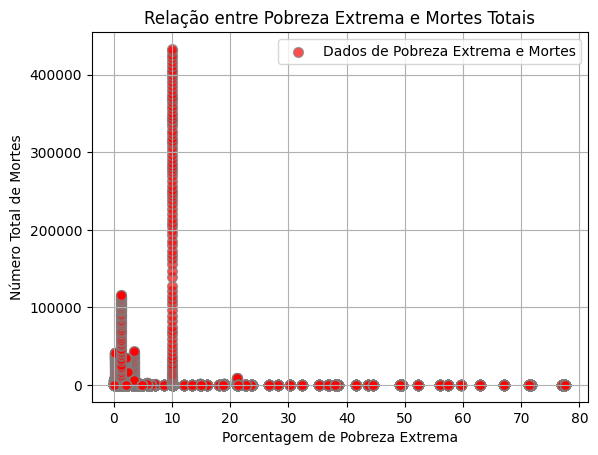

In [65]:
fig, ax = plt.subplots()

# Adicionar os pontos de dispersão
scatter = ax.scatter(
    df['extreme_poverty'],
    df['total_deaths'],
    color='red',
    edgecolor='grey',
    s=50,
    alpha=0.7,
    label='Dados de Pobreza Extrema e Mortes'
)

# Adicionar título e rótulos
ax.set_title('Relação entre Pobreza Extrema e Mortes Totais')
ax.set_xlabel('Porcentagem de Pobreza Extrema')
ax.set_ylabel('Número Total de Mortes')
ax.grid(True)


ax.legend()

plt.show()

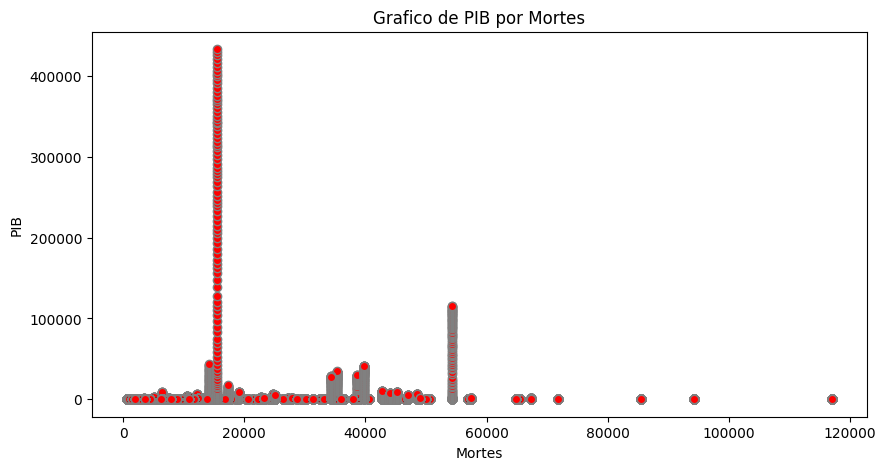

In [66]:
#Analise do PIB dos Países pela quantidade de casos

fig,ax = plt.subplots(figsize=(10,5))

ax.scatter(df.gdp_per_capita, df.total_deaths , color='red', edgecolor="grey")
ax.set_ylabel('PIB')
ax.set_xlabel('Mortes')
ax.set_title('Grafico de PIB por Mortes')
plt.show();

In [52]:
cases = pd.DataFrame(df_data_atual.groupby('location')['total_cases'].sum())
cases.drop('World', errors='ignore', inplace=True)
cases = cases.sort_values(by='total_cases', ascending=False)

cases = cases.head()

In [53]:
cases

,total_cases
location,
United States,2094069.0
Brazil,867624.0
Russia,528964.0
India,332424.0
United Kingdom,295889.0


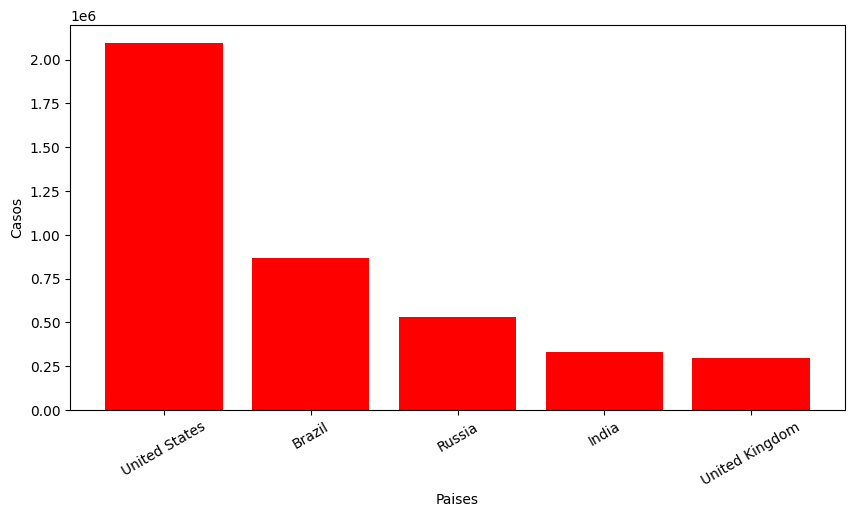

''

In [68]:

#Lista dos 5 Paises com mais casos no mundo
fig, ax = plt.subplots(figsize=(10,5))

ax.bar(cases.index, cases.total_cases, color='red')
ax.set_xlabel('Paises')
ax.set_ylabel('Casos')
plt.xticks(rotation=30)
plt.show()
;


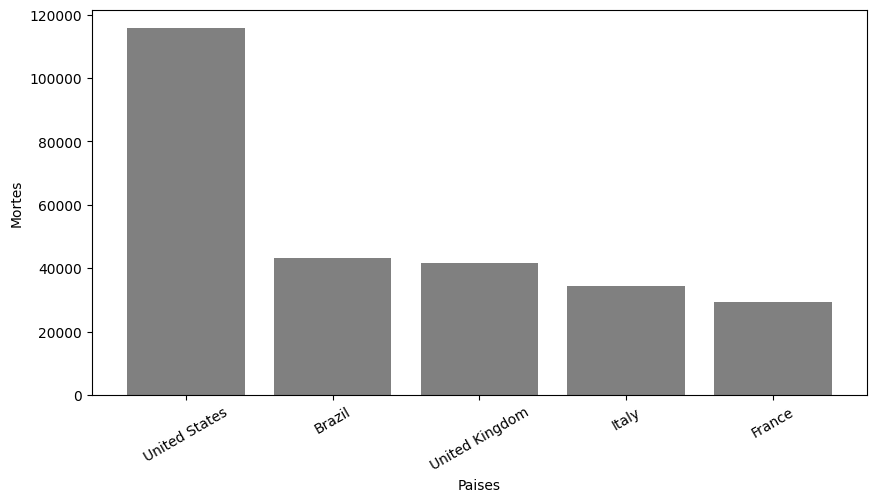

''

In [76]:
cases = pd.DataFrame(df_data_atual.groupby('location')['total_deaths'].sum())
cases.drop('World', errors='ignore', inplace=True)
cases = cases.sort_values(by='total_deaths', ascending=False)

cases = cases.head()


#Lista dos 5 Paises com mais casos no mundo
fig, ax = plt.subplots(figsize=(10,5))

ax.bar(cases.index, cases.total_deaths, color='grey')
ax.set_xlabel('Paises')
ax.set_ylabel('Mortes')
plt.xticks(rotation=30)
plt.show()
;


<Axes: >

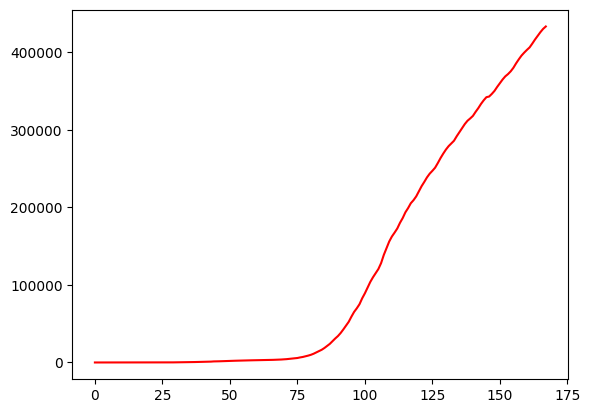

In [55]:
df.loc[df.location == "World", "total_deaths"].reset_index(drop=True).plot(color='red')

In [56]:
table =  pd.pivot_table(df, values= 'total_deaths', columns='location', aggfunc=np.sum, index='date')
table = pd.DataFrame(table.to_records()).set_index('date')
table = table.fillna(0)

In [57]:

#Grafico de Ranck de mortes
bcr.bar_chart_race(
    df=table,
    n_bars =6,
    filename='total_deaths_over_time.mp4',
    sort='desc',
    title='Total Deaths Over Time'
)


/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:284: UserWarning: Glyph 127 () missing from current font.
  fig.canvas.print_figure(io.BytesIO())
/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:284: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(io.BytesIO())
/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:284: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(io.BytesIO())
/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:284: UserWarning: Glyph 130 (\x82) missing from current font.
  fig.canvas.print_figure(io.BytesIO())
/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:284: UserWarning: Glyph 131 (\x83) missing from current font.
  fig.canvas.print_figure(io.BytesIO())
/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:284: UserWarning: Glyph 132 (\x84) missing from current font.
  fig.canva

Vamos......

### Análise Exploratória para o Brasil



In [58]:
df_brasil = df.loc[df.location == "Brazil"].copy()

In [59]:
df_brasil.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand
3097,BRA,South America,Brazil,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,...,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2
3098,BRA,South America,Brazil,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,...,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2
3099,BRA,South America,Brazil,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,...,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2
3100,BRA,South America,Brazil,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,...,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2
3101,BRA,South America,Brazil,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,...,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2


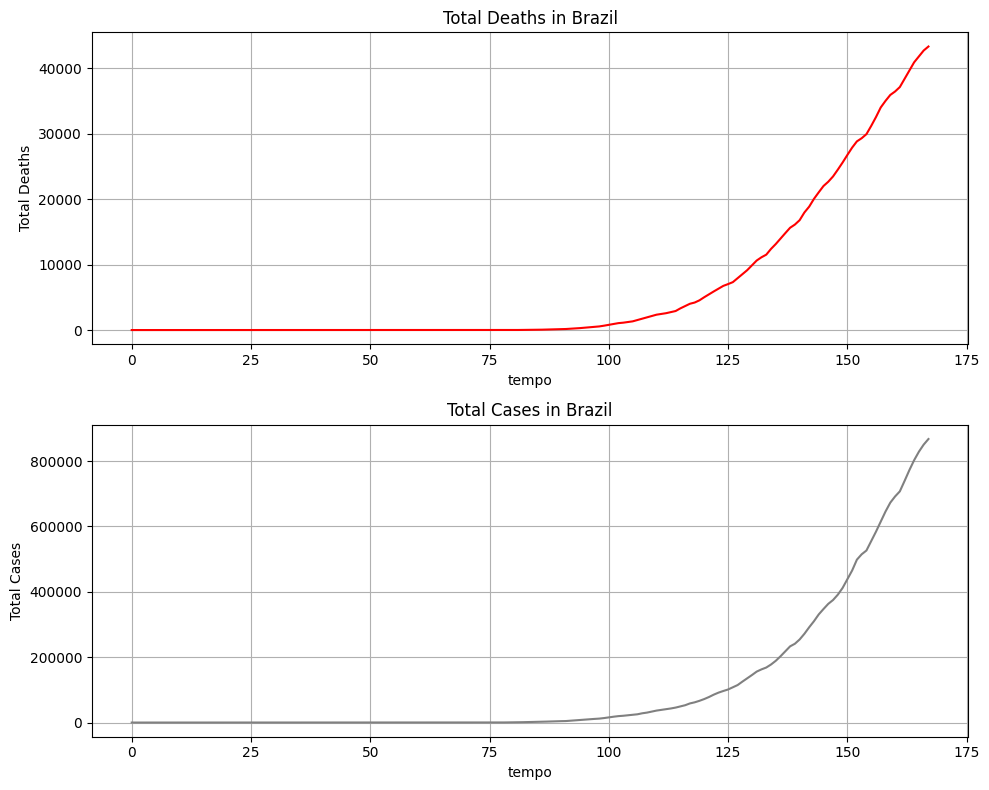

In [77]:

# Filtrar dados para o Brasil
total_deaths_brazil = df_brasil.loc[df_brasil.location == "Brazil", "total_deaths"].reset_index(drop=True)
total_cases_brazil = df_brasil.loc[df_brasil.location == "Brazil", "total_cases"].reset_index(drop=True)

# Criar uma figura com dois subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Primeiro gráfico - Total Deaths
ax1.plot(total_deaths_brazil, color='red')
ax1.set_xlabel('tempo')
ax1.set_ylabel('Total Deaths')
ax1.set_title('Total Deaths in Brazil')
ax1.grid(True)

# Segundo gráfico - Total Cases
ax2.plot(total_cases_brazil, color='grey')
ax2.set_xlabel('tempo')
ax2.set_ylabel('Total Cases')
ax2.set_title('Total Cases in Brazil')
ax2.grid(True)

# Ajustar layout para evitar sobreposição
plt.tight_layout()

# Mostrar o gráfico

## Conclusão
 A análise das variações nos números de casos de COVID-19 até junho de 2020 destaca a importância de estratégias coordenadas e eficazes de saúde pública. Países que inicialmente lideraram em número de casos, como a China, conseguiram controlar a situação através de medidas rigorosas. Em contraste, países que emergiram como novos epicentros, como Brasil e Estados Unidos, enfrentaram desafios contínuos na gestão da pandemia.

Além disso, a associação entre o número de casos e o PIB dos países ressalta a necessidade de considerar fatores econômicos e sociais ao formular políticas de combate à pandemia. A análise reforça a importância de uma abordagem multidimensional que combine medidas de saúde pública, suporte econômico e cooperação internacional para enfrentar crises globais como a COVID-19. *